# PROJECT MODULE IV - RESÍLIA - GROUP 7

   ## Preço de Venda da Gasolina e do Etanol [Série Histórica]

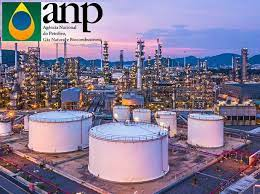

## I. INTRODUCTION

### I.I Briefing

A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural:
    
 - mantém o Banco de Dados de Exploração e Produção (BDEP);
 - promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
 - recebe e torna públicas as notificações de descobertas;
 - divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.

O órgão também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.

ATIVIDADE:
**Realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.**

Fontes de dados a serem utilizadas estão disponíveis no portal dados.gov (https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/). O estudo baseará nos arquivos dos meses de junho e julho de 2021 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil.

### I.II  Problems to Solve

1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4) Qual o preço médio da gasolina e do etanol por estado?

5) Qual o município que possui o menor preço para a gasolina e para o etanol?

6) Qual o município que possui o maior preço para a gasolina e para o etanol?

7) Qual a região que possui o maior valor médio da gasolina?

8) Qual a região que possui o menor valor médio do etanol?

9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

***EXTRAS***

11) Outlier Gasolina

12) Outlier Etanol


Link dos Datasets:https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv
///
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv


## II. IMPORTS

### II.I Libraries

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### II.II Datasets


In [302]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
gasol06 = pd.read_csv(url, engine = 'python', on_bad_lines='skip', sep = ';')
gasol06.head(1)

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [303]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
gasol07 = pd.read_csv(url,on_bad_lines='skip',sep = ';')
gasol07.head(1)

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA


## III. TREATMENT, CLEANING AND INTRODUCTORY EXPLORATIONS


In [309]:
#Functions

#Função para trocar vírgula por ponto e converter em float
def convertFloatMonetary(dfDef, colunaDef):
    dfDef[colunaDef] = dfDef[colunaDef].apply(lambda x: float(x.replace(",",".")))
    
#Função para substituir valores NaN do dataframe por um de sua escolha
def filterNoneSubstitute(dfDef, colunaDef, dataDef):
    dfDef.fillna({colunaDef: dataDef}, inplace = True)

In [320]:
#Análise de objetos
gasol06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49737 entries, 0 to 49736
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Região - Sigla     49737 non-null  object
 1   Estado - Sigla     49737 non-null  object
 2   Município          49737 non-null  object
 3   Revenda            49737 non-null  object
 4   CNPJ da Revenda    49737 non-null  object
 5   Nome da Rua        49737 non-null  object
 6   Número Rua         49737 non-null  object
 7   Complemento        10052 non-null  object
 8   Bairro             49737 non-null  object
 9   Cep                49737 non-null  object
 10  Produto            49737 non-null  object
 11  Data da Coleta     49737 non-null  object
 12  Valor de Venda     49737 non-null  object
 13  Unidade de Medida  49737 non-null  object
 14  Bandeira           49737 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


In [349]:
gasol07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47849 entries, 0 to 47848
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Região - Sigla     47849 non-null  object        
 1   Estado - Sigla     47849 non-null  object        
 2   Município          47849 non-null  object        
 3   Revenda            47849 non-null  object        
 4   CNPJ da Revenda    47849 non-null  object        
 5   Nome da Rua        47849 non-null  object        
 6   Número Rua         47849 non-null  object        
 7   Complemento        9659 non-null   object        
 8   Bairro             47849 non-null  object        
 9   Cep                47849 non-null  object        
 10  Produto            47849 non-null  object        
 11  Data da Coleta     47849 non-null  datetime64[ns]
 12  Valor de Venda     47849 non-null  object        
 13  Unidade de Medida  47849 non-null  object        
 14  Bandei

In [352]:
#Substituição da vírgula para ponto, conversão de dados object para float 
convertFloatMonetary(gasol07, 'Valor de Venda')
convertFloatMonetary(gasol06, 'Valor de Venda')

In [312]:
#Tratando dados faltantes do Dataframe que não afetam em valores
#print(gasol06[gasol06['Número Rua'].isnull()].shape[0])
filterNoneSubstitute(gasol07, 'Número Rua', '')
filterNoneSubstitute(gasol06, 'Número Rua', '')
filterNoneSubstitute(gasol07, 'Bairro', '')
filterNoneSubstitute(gasol06, 'Bairro', '')
#print(gasol06[gasol06['Número Rua'].isnull()].shape[0])

In [319]:
#Exclusão de coluna que não tem valor algum
gasol07.drop(axis = 1, columns = ["Valor de Compra"], inplace = True)
gasol06.drop(axis = 1, columns = ["Valor de Compra"], inplace = True)

In [326]:
from datetime import date, datetime

In [357]:
#Converter coluna para o tipo Data e formato brasileiro
gasol06['Data da Coleta'] = pd.to_datetime(gasol06['Data da Coleta'])
gasol07['Data da Coleta'] = pd.to_datetime(gasol07['Data da Coleta'])
gasol06['Data da Coleta'].dt.strftime('%d/%m/%Y')
gasol07['Data da Coleta'].dt.strftime('%d/%m/%Y')

0        07/01/2021
1        07/01/2021
2        07/01/2021
3        07/01/2021
4        07/01/2021
            ...    
47844    26/07/2021
47845    26/07/2021
47846    26/07/2021
47847    28/07/2021
47848    28/07/2021
Name: Data da Coleta, Length: 47849, dtype: object

In [358]:
#Concatenação
dfGasol = pd.concat([gasol06,gasol07])
dfGasol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97586 entries, 0 to 47848
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Região - Sigla     97586 non-null  object        
 1   Estado - Sigla     97586 non-null  object        
 2   Município          97586 non-null  object        
 3   Revenda            97586 non-null  object        
 4   CNPJ da Revenda    97586 non-null  object        
 5   Nome da Rua        97586 non-null  object        
 6   Número Rua         97586 non-null  object        
 7   Complemento        19711 non-null  object        
 8   Bairro             97586 non-null  object        
 9   Cep                97586 non-null  object        
 10  Produto            97586 non-null  object        
 11  Data da Coleta     97586 non-null  datetime64[ns]
 12  Valor de Venda     97586 non-null  float64       
 13  Unidade de Medida  97586 non-null  object        
 14  Bandei

## IV. DATA ANALYSIS

### VI.I Questions 1 and 2 [Henrique]

1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4) Qual o preço médio da gasolina e do etanol por estado?

### VI.II Question 3 [Jaqueline]

>3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

Os primeiros processos para conscrução da resposta foi analisar os passos necessários, os quais seguem abaixo:

1. Organização dos dados necessários
2. Concatenção tabela 06 e 07
3. Ordenação e Média





Ao  decorrer da questão, notei que seria necessário restruturar o DataFrame com informações que atendecem meus requisitos.

Com o objetivo de vizualizar melhor as colunas nas quais obtinham os dados que eu precisaria, realizei uma combinação de  filtragem e concatenação.

Por fim, filtrei as colunas necessárias, separei por etanol/ gasolina e gasolina aditivada,  concatei as tabelas 06 e 07 . Após isso criei uma variável para a mádia de cada um, agrupando as informações desejadas e obtive o resultado AC/AL/AM/AP/BA como estados com a maior média da Gasolina.


In [ ]:
novo_06 = gasol_06.filter(['Estado - Sigla', 'Município', 'Produto', 'Valor de Venda'], axis=1)
novo_06

In [ ]:
gasolinaMes6 = novo_06[novo_06['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
gasolinaMes6

In [ ]:
etanolMes6 = novo_06[novo_06['Produto'].isin(['ETANOL'])]
etanolMes6

In [ ]:
novo_07 = gasol_07.filter(['Estado - Sigla', 'Município', 'Produto', 'Valor de Venda'], axis=1)
novo_07

In [ ]:
gasolinaMes7 = novo_07[novo_07['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
gasolinaMes7

In [ ]:
etanolMes7 = novo_07[novo_07['Produto'].isin(['ETANOL'])]
etanolMes7

Verificando a média individual de 06 e 07

In [ ]:
gasolinaMes6['Valor de Venda'].mean()

In [ ]:
gasolinaMes7['Valor de Venda'].mean()

In [ ]:
etanolMes6['Valor de Venda'].mean()

In [ ]:
etanolMes7['Valor de Venda'].mean()

Concatenação das tabelas 06 e 07 - Gasolina

OBS:
Foi analisado a média do valor de venda da gasolina nos meses de junho e julho de forma unificada, que é de 5.79, para comparação dos dados mais segmentados, caso houvesse dados muito distintos.

In [ ]:
concat_gasol = pd.concat([gasolinaMes6, gasolinaMes7])
concat_gasol

In [ ]:
concat_gasol['Valor de Venda'].mean()

Concatenação das tabelas 06 e 07 - Etanol

OBS: A média geral do Etanol nos meses deJunho e Julho é 4.58.

In [ ]:
concat_etanol = pd.concat([etanolMes6, etanolMes7])
concat_etanol

In [ ]:
concat_etanol['Valor de Venda'].mean()

In [ ]:
estado_mediagasol = concat_gasol.groupby('Estado - Sigla').mean()

In [ ]:
estado_mediagasol.groupby(by="Estado - Sigla")["Valor de Venda"].nlargest(5).head(5)

In [ ]:
estado_mediaetanol = concat_etanol.groupby('Estado - Sigla').mean()

In [ ]:
estado_mediaetanol.groupby(by="Estado - Sigla")["Valor de Venda"].nlargest(5).head(5)

Os 5 estados com ambas médias mais caras são:

1. Acre
2. Alagoas
3. Amazonas
4. Amapá
5. Bahia

### VI.III Question 4 [Laio]

> 4) Qual o preço médio da gasolina e do etanol por estado?

- Selecionei a partir do dataframe concatenado apenas as tabelas que considerei importantes para extrair as informações da questão 4

In [ ]:
df6e7[['Estado - Sigla','Produto', 'Valor de Venda']]

- Converti a coluna Valor de Venda para numérico

In [ ]:
df6e7['Valor de Venda'] = pd.to_numeric(df6e7['Valor de Venda'])

**Etanol**

- Criei um novo df onde selecionei apenas o produto = 'ETANOL', juntamente com as colunas que foram necessárias para a extração do preço médio do produto por estado

In [ ]:
medio_etanol_estado = (df6e7.loc[df6e7['Produto'] == 'ETANOL', ["Estado - Sigla","Produto", "Valor de Venda"]])

- Agrupei o df onde havia apenas o produto ETANOL por estado e extraí a média dos valores de venda

In [ ]:
medio_etanol_estado.groupby(['Produto', 'Estado - Sigla'], as_index = False).mean()

**Gasolina**

- Criei um novo df onde selecionei apenas o produto = 'GASOLINA', juntamente com as colunas que foram necessárias para a extração do preço médio do produto por estado

In [ ]:
medio_gasolina_estado = (df6e7.loc[df6e7['Produto'] == 'GASOLINA', ["Estado - Sigla", "Produto", "Valor de Venda"]])

- Agrupei o df onde havia apenas o produto GASOLINA por estado e extraí a média dos valores de venda

In [ ]:
(medio_gasolina_estado.groupby(['Produto', 'Estado - Sigla'], as_index = False).mean())

**Gasolina Aditivada**

In [ ]:
medio_gasoadit_estado = (df6e7.loc[df6e7['Produto'] == 'GASOLINA ADITIVADA', ["Estado - Sigla", "Produto", "Valor de Venda"]])

- Agrupei o df onde havia apenas o produto GASOLINA ADITIVADA por estado e extraí a média dos valores de venda

In [ ]:
(medio_gasoadit_estado.groupby(['Produto', 'Estado - Sigla'], as_index = False).mean())

### VI.IV Questions 5 and 6 [Beatriz]

> Principais etapas para elaborar a resposta da questão: 

• Concatenar os Dataframes referentes aos meses de junho (gasol_06) e julho (gasol_07);

• Obter um resumo conciso do dataframe por meio da função df.info()

• Utilizar a função astype para alterar o tipo de dados da coluna ‘Valor de Venda’ para float;

• Para descobrir quais municípios apresentaram o valor máximo e o valor mínimo dos produtos solicitados, foram criadas variáveis que agregam as consultas (método query) dos respectivos valores (funções min() e max());

• Utilizar o método format() que permite substituições e formatação de valor.




In [ ]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
gasol_06 = pd.read_csv(url,on_bad_lines='skip', sep = ';')
#gasol_06

In [ ]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
gasol_07 = pd.read_csv(url, engine = 'python', on_bad_lines='skip', sep = ';')
#gasol_07

In [ ]:
df6e7 = pd.concat([gasol_06, gasol_07])
#df6e7

In [ ]:
df6e7.info()

In [ ]:
#df6e7.head(5)

In [ ]:
df6e7['Valor de Venda'] = df6e7['Valor de Venda'].apply(lambda x:str(x).replace(",",".")) 
df6e7

In [ ]:
df6e7['Valor de Venda'] = df6e7['Valor de Venda'].astype('float64')
df6e7

>5) Qual o município que possui o menor preço para a gasolina e para o etanol?


Função utilizada para consultar qual município apresenta o menor preço da Gasolina

In [ ]:
min_gasolina = df6e7.query('Produto == "GASOLINA"')['Valor de Venda'].min()
df6e7.query('Produto == "GASOLINA" and `Valor de Venda` == {}'.format(min_gasolina))


Função utilizada para consultar qual município apresenta o menor preço do Etanol

In [ ]:
min_etanol = df6e7.query('Produto == "ETANOL"')['Valor de Venda'].min()
df6e7.query('Produto == "ETANOL" and `Valor de Venda` == {}'.format(min_etanol))

>6) Qual o município que possui o maior preço para a gasolina e para o etanol?

Função utilizada para consultar qual município apresenta o maior preço da Gasolina

In [ ]:
max_gasolina = df6e7.query('Produto == "GASOLINA"')['Valor de Venda'].max()
df6e7.query('Produto == "GASOLINA" and  `Valor de Venda` == {}'.format(max_gasolina))


Função utilizada para consultar qual município apresenta o maior preço do Etanol

In [ ]:
max_etanol = df6e7.query('Produto == "ETANOL"')['Valor de Venda'].max()
df6e7.query('Produto == "ETANOL" and `Valor de Venda` == {}'.format(max_etanol))

### VI.V Question 7 [Jaqueline]

>7) Qual a região que possui o maior valor médio da gasolina?

Para resolução da pergunta foi criado um DataFrame contendo somente as siglas das regiões, o produto e o valor de venda. O processo para resposta da pergunta seguiu a seguinte lógica: 

1. criação do DF e Concatenaçã0 06/07
2. média
3. ordenação

Seleção de dados importantes do DataFrame - mês 06

In [ ]:
regiao_06 = gasol_06.filter(['Região - Sigla','Produto', 'Valor de Venda'], axis=1)
regiao_06

Separação de tipo de produto - mês 06



In [ ]:
regiao_gasolMes6 = regiao_06[regiao_06['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
regiao_gasolMes6

Seleção de dados importantes do DataFrame - mês 07

In [ ]:
regiao_07 = gasol_07.filter(['Região - Sigla','Produto', 'Valor de Venda'], axis=1)
regiao_07

Separação de tipo de produto - mês 07

In [ ]:
regiao_gasolMes7 = regiao_07[regiao_07['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
regiao_gasolMes7

Concatenação de tabelas

In [ ]:
concat_regiaogasol = pd.concat([regiao_gasolMes6, regiao_gasolMes7])
concat_regiaogasol

Média por região

In [ ]:
regiao_mediagasol = concat_regiaogasol.groupby('Região - Sigla').mean()
regiao_mediagasol

A região que possui o maior valor médio da gasolina é a Centro Oeste.



### VI.VII Question 8 [Laio]

>8) Qual a região que possui o menor valor médio do etanol?



- Busquei nos dataframes o menor Valor de Venda para o ETANOL usando o LOC() e retornei o Produto, juntamente com o Valor de Venda e a Região - Sigla para responder a questão 8

In [ ]:
gasol_06.loc[gasol_06['Produto'] == 'ETANOL', ["Região - Sigla", "Valor de Venda"]].min()

In [ ]:
gasol_07.loc[gasol_07['Produto'] == 'ETANOL', ["Região - Sigla", "Valor de Venda"]].min()

In [ ]:
df6e7.loc[df6e7['Produto'] == 'ETANOL', ["Região - Sigla", "Valor de Venda"]].min()

### Questions 9 and 10 [Jonathas]

>9) Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [ ]:
c06 = gasol_06
c06 = c06.drop(['Estado - Sigla', 'Município', 'Revenda', 'CNPJ da Revenda', 'Nome da Rua', 'Número Rua', 'Complemento', 'Bairro',
       'Cep', 'Data da Coleta', 'Valor de Compra', 'Unidade de Medida'], axis = 1)

In [ ]:
c06.head(2)

In [ ]:
c06['Região - Sigla'].unique()

In [ ]:
norte = c06.loc[(c06['Região - Sigla'] == 'N')]
nordeste = c06.loc[(c06['Região - Sigla'] == 'NE')]
centro_oeste = c06.loc[(c06['Região - Sigla'] == 'CO')]
sudeste = c06.loc[(c06['Região - Sigla'] == 'SE')]
sul = c06.loc[(c06['Região - Sigla'] == 'S')]

In [ ]:
#sudeste.describe()
c06['Valor de Venda'] = c06['Valor de Venda'].apply(lambda x: float(x.replace(',', '.')))

In [ ]:
#Infere-se que as regiões mais afastadas dos grandes centros urbanos brasileiros (capitais dos estados de 
#São Paulo, Rio de Janeiro e Minas Gerais (https://brasilescola.uol.com.br/geografia/cinco-maiores-metropoles-brasileiras.htm), 
#são as detentoras do maior preço média de Valor de Venda do combustível.

#Gasolina
combustivel_gasol_filt = c06.loc[(c06['Produto'] == 'GASOLINA')]
combustivel_gasol_filt.groupby('Região - Sigla')['Valor de Venda'].describe()

In [ ]:
#Gasolina Aditivada
combustivel_gasola_filt = c06.loc[(c06['Produto'] == 'GASOLINA ADITIVADA')]
combustivel_gasola_filt.groupby('Região - Sigla')['Valor de Venda'].describe()

In [ ]:
#Etanol
combustivel_etanol_filt = c06.loc[(c06['Produto']=='ETANOL')]
combustivel_etanol_filt.groupby('Região - Sigla')['Valor de Venda'].describe()

In [ ]:
#c06.groupby('Região - Sigla')['Valor de Venda'].describe()
#a = combustivel_etanol_filt.groupby('Região - Sigla')['Valor de Venda'].describe()
#a['mean'].plot()
#plt.imshow(a[['count']], cmap ="RdYlBu")

>10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [ ]:
c06['Bandeira'].unique()

In [ ]:
combustivel_gasol_band_filt = c06.loc[(c06['Produto']=='GASOLINA')]
combustivel_gasola_band_filt = c06.loc[(c06['Produto']=='GASOLINA ADITIVADA')]
combustivel_etanol_band_filt = c06.loc[(c06['Produto']=='ETANOL')]

In [ ]:
#Observado que a Branca, Petrobras Distribuidora, Ipiranga e a Raizen são, respectivamente nessa ordem decrescente, 
#as detentoras de maior pontos comercializado
cgbf = combustivel_gasol_band_filt.groupby('Bandeira')['Valor de Venda'].describe()
cgbf

In [ ]:
cgabf = combustivel_gasola_band_filt.groupby('Bandeira')['Valor de Venda'].describe()
cgabf

In [ ]:
cebf = combustivel_etanol_band_filt.groupby('Bandeira')['Valor de Venda'].describe()
cebf

In [ ]:
cgbf = cgbf.reset_index()
cgabf = cgabf.reset_index()
cebf = cebf.reset_index()

In [ ]:
#cgbf.plot(x='Bandeira', y=['mean'], kind='bar')
a = pd.DataFrame({'bandeira':cgbf['Bandeira'], 'gasolina':cgbf['mean'], 'gasolina adi':cgabf['mean'], 'etanol':cebf['mean']})
#a.plot(x='bandeira', y=['gasolina', 'gasolina adi', 'etanol'], kind='bar')
#a.hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
#a.corr()
a.plot(x='bandeira', kind='bar', figsize=(25, 4))

In [ ]:
gasol_query = cgbf.query('count > 300')
gasola_query = cgabf.query('count > 300')
etanol_query = cebf.query('count > 300')
comb_grafico = pd.DataFrame({'bandeira':gasol_query['Bandeira'], 'gasolina':gasol_query['mean'], 'gasolina adi':gasola_query['mean'], 'etanol':etanol_query['mean']})
comb_grafico.plot(x='bandeira', kind='bar', figsize=(25, 4))

### VI.VIII Question Extra 11 - Outlier Gasolina**

>11) Análise de desvio de padrão no preço da gasolina.



In [ ]:
#outlier_06 = gasol_06.filter(['Estado - Sigla', 'Produto', 'Valor de Venda'], axis=1)


In [ ]:
outlierGasol = df6e7Gasolina.boxplot()

Notamos que os valores, apesar de baixos, não era tão distantes da média.

### VI.IX Question Extra 12 - Outlier Etanol

>12) Análise de desvio de padrão no preço do etanol.

In [ ]:
outlierEtanol = df6e7Etanol.boxplot()

Notamos que os valores, diferentemente da gasolina que era abaixo do valor médio, o outlier do Etanol eram valores acima da média e bem distantes do Valor de Venda padrão.

## V. Conclusão

A partir das análises realizadas no projeto, podemos verificar que as regiões mais afastadas são as que mais sofrem com a variação de preço do combustível. Por exemplo, nas médias de valor mais alto por estado, a região Norte e Centro Oeste foram as que obtiveram os maiores valores de preço de venda. A diferença na precificação da gasolina entre os estados também pode ser explicada pelo valor do ICMS. 

Foram realizadas pesquisas complementares para compreender o contexto sócio econômico vigente no país durante o período analisado e nos demais meses de 2021. O objetivo era analisar se os valores pertenciam a algum padrão.
A partir das consultas, compreendemos que no mês 6 (junho) houve um pico, enquanto no mês 7 (julho) se estabilizou, devido a fatores variantes de especulação e também ao agravante da pandemia.

Foi possível verificar ainda que, as cidades que apresentam os valores mais altos da gasolina e do etanol, não estão localizadas no centro-oeste, que é a região que possui a maior média nacional de preços de venda dos produtos.

Nas questões finais, utilizamos gráficos (boxplot) para analisar possíveis outliers. Devido a curta periodicidade da análise, constatou-se uma variação mínima. A expectativa era de que esses resultados fossem valores discrepantes em relação a valores altos, porém os outliers foram abaixo da média. 

Contudo, vale ressaltar que o valor do combustível está alto de uma maneira geral e diversos fatores podem influenciar o preço, como por exemplo: cotações do dólar, do barril de petróleo e de outras commodities. 

O Brasil apesar de ser um dos maiores produtores de petróleo, não possui tecnologia de refino e, por isso, precisa importar de outros países. O valor do petróleo afeta a inflação e a logística de comércio não beneficia as regiões com maiores potenciais de venda.